In [3]:
import pandas as pd
import numpy as np
import os

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

##Reading Data

In [5]:
data = pd.read_csv("/content/train.csv")
unseen = pd.read_csv("/content/test.csv")
#sample_d = pd.read_csv("/content/sample_data")
data_dict = pd.read_csv("/content/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
#print(sample_d.shape)
print(data_dict.shape)

(29733, 61)
(9911, 60)
(61, 3)


## Getting an estimate on NULL values and feature data types

In [7]:
data.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             29733 non-null  int64  
 1   url                            29733 non-null  object 
 2   n_tokens_title                 29733 non-null  float64
 3   n_tokens_content               29733 non-null  float64
 4   n_unique_tokens                29733 non-null  float64
 5   n_non_stop_words               29733 non-null  float64
 6   n_non_stop_unique_tokens       29733 non-null  float64
 7   num_hrefs                      28921 non-null  float64
 8   num_self_hrefs                 25200 non-null  float64
 9   num_imgs                       24326 non-null  float64
 10  num_videos                     29146 non-null  float64
 11  average_token_length           29733 non-null  float64
 12  num_keywords                   29269 non-null 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


## Checking the values where we have one unique value in column

In [8]:

data.nunique(dropna=True)
#we see below no such column

id                              29733
url                             29733
n_tokens_title                     20
n_tokens_content                 2250
n_unique_tokens                 21820
                                ...  
title_subjectivity                597
title_sentiment_polarity          706
abs_title_subjectivity            469
abs_title_sentiment_polarity      546
shares                           1339
Length: 61, dtype: int64

## Checking percentage NULL data

In [11]:
#checking the Number of Null values
missing_data_percent=round(100 *(data.isnull().sum()/len(data.index)),2)
missing_data_percent.head(60)




id                                0.00
url                               0.00
n_tokens_title                    0.00
n_tokens_content                  0.00
n_unique_tokens                   0.00
n_non_stop_words                  0.00
n_non_stop_unique_tokens          0.00
num_hrefs                         2.73
num_self_hrefs                   15.25
num_imgs                         18.19
num_videos                        1.97
average_token_length              0.00
num_keywords                      1.56
data_channel_is_lifestyle         0.00
data_channel_is_entertainment     0.00
data_channel_is_bus               0.00
data_channel_is_socmed            0.00
data_channel_is_tech              0.00
data_channel_is_world             0.00
kw_min_min                        3.65
kw_max_min                        1.53
kw_avg_min                        0.28
kw_min_max                        0.46
kw_max_max                        5.10
kw_avg_max                        0.39
kw_min_avg               

In [ ]:
#checking null value in descending order
data.isnull().sum().sort_values(ascending=False)

num_imgs                         2768
num_self_hrefs                   2350
is_weekend                       1149
global_subjectivity              1122
self_reference_max_shares         907
                                 ... 
data_channel_is_lifestyle           0
data_channel_is_entertainment       0
data_channel_is_bus                 0
data_channel_is_socmed              0
id                                  0
Length: 61, dtype: int64

## Imputing NULL values since no column has more than 20% mising data

In [12]:
# Import necessary modules for imputing NULL values
from sklearn.impute import KNNImputer

imp=KNNImputer()
impute_features = missing_data_percent[missing_data_percent.gt(0)].index
impute_features

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity'],
      dtype='object')

##IMPUTING NULL VALUES

In [13]:
# Imputed with KNN Imputer
imp= KNNImputer()
data[impute_features] = imp.fit_transform(data[impute_features])

In [14]:
#Checking the Null values again 
round(100 *(data.isnull().sum()/len(data.index)),2)

id                              0.0
url                             0.0
n_tokens_title                  0.0
n_tokens_content                0.0
n_unique_tokens                 0.0
                               ... 
title_subjectivity              0.0
title_sentiment_polarity        0.0
abs_title_subjectivity          0.0
abs_title_sentiment_polarity    0.0
shares                          0.0
Length: 61, dtype: float64

##Checking missing values using library

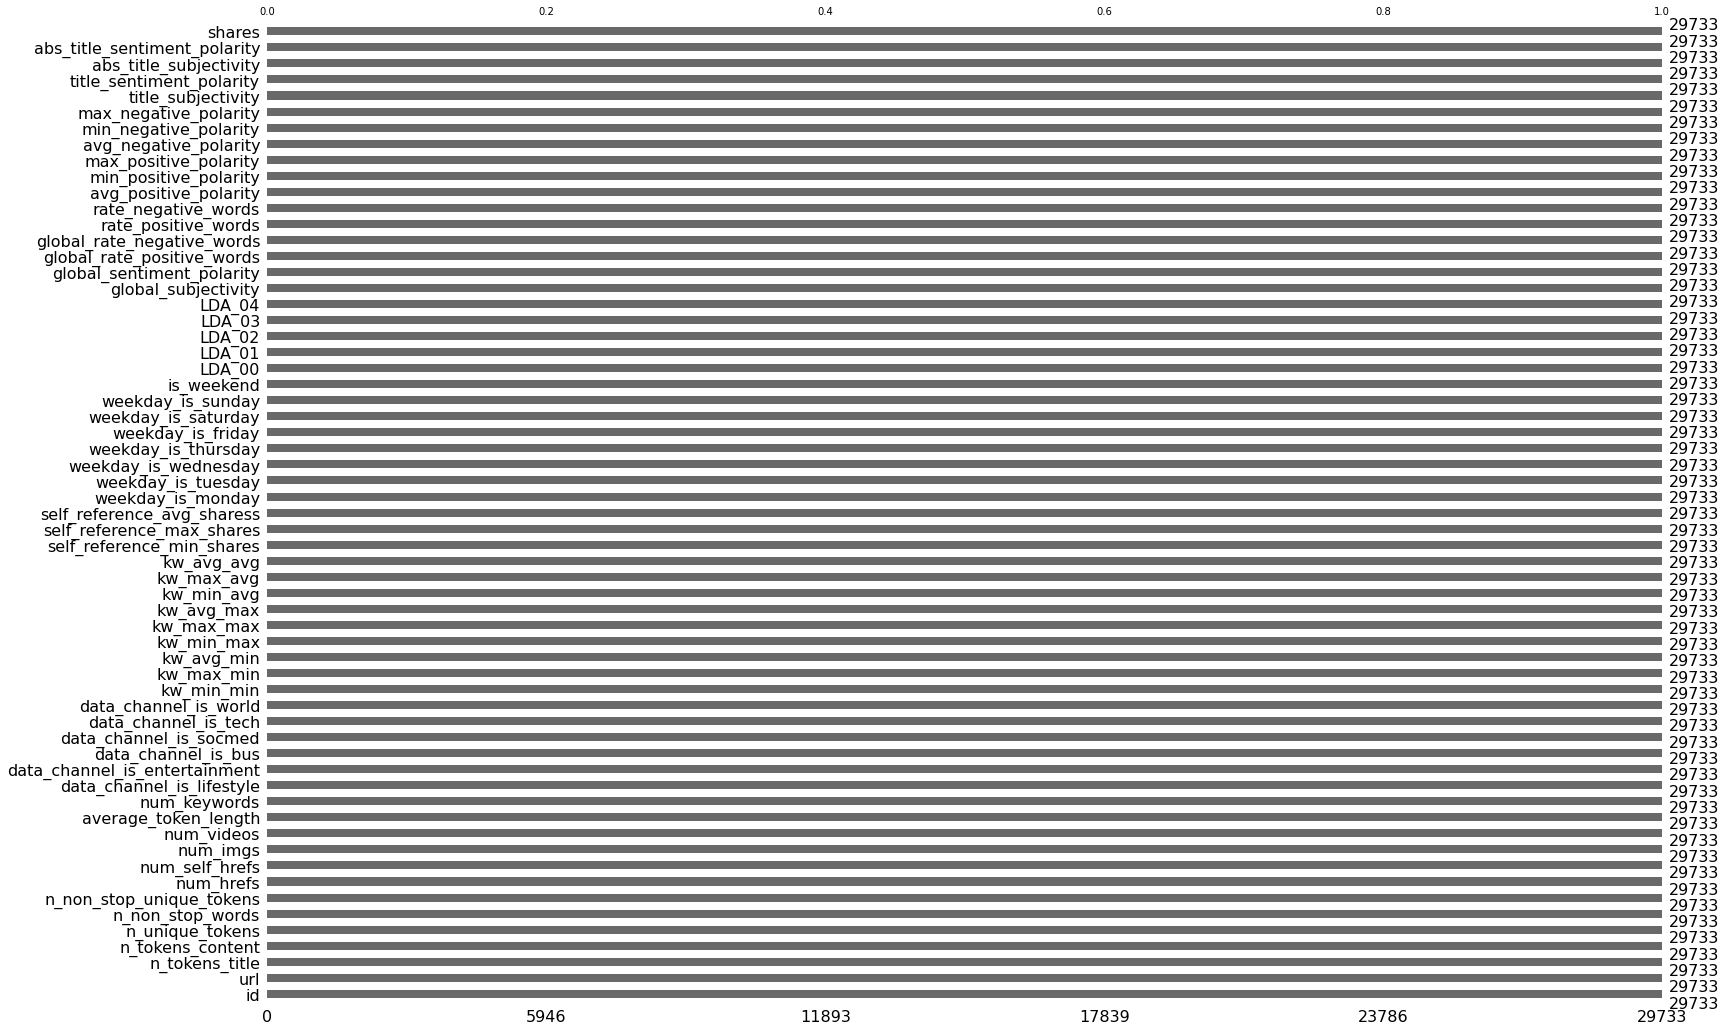

In [15]:
msno.bar(data)

In [16]:
missing_per = 100*data.isnull().sum()/len(data)
missing_per.head(60).sort_values()

id                               0.0
weekday_is_tuesday               0.0
weekday_is_wednesday             0.0
weekday_is_thursday              0.0
weekday_is_friday                0.0
weekday_is_saturday              0.0
weekday_is_sunday                0.0
is_weekend                       0.0
LDA_00                           0.0
LDA_01                           0.0
LDA_02                           0.0
LDA_03                           0.0
LDA_04                           0.0
weekday_is_monday                0.0
global_subjectivity              0.0
global_rate_positive_words       0.0
global_rate_negative_words       0.0
rate_positive_words              0.0
rate_negative_words              0.0
avg_positive_polarity            0.0
min_positive_polarity            0.0
max_positive_polarity            0.0
avg_negative_polarity            0.0
min_negative_polarity            0.0
max_negative_polarity            0.0
title_subjectivity               0.0
title_sentiment_polarity         0.0
g

#DATA CLEANING


##CHECKING DATA TYPE

In [ ]:
# To check each variable datatype 
data.info(verbose=1,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15397 entries, 0 to 15396
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             15397 non-null  int64  
 1   url                            15397 non-null  object 
 2   n_tokens_title                 15397 non-null  float64
 3   n_tokens_content               15397 non-null  float64
 4   n_unique_tokens                15397 non-null  float64
 5   n_non_stop_words               15397 non-null  float64
 6   n_non_stop_unique_tokens       15397 non-null  float64
 7   num_hrefs                      15397 non-null  float64
 8   num_self_hrefs                 15397 non-null  float64
 9   num_imgs                       15397 non-null  float64
 10  num_videos                     15397 non-null  float64
 11  average_token_length           15397 non-null  float64
 12  num_keywords                   15397 non-null 

In [ ]:
# checking the shape of the data again 
data.shape

(15397, 61)

In [ ]:
# Checking if there are columns with one unique value since it won't affect our analysis
data.nunique(dropna=True).head(60)


id                               15397
url                              15397
n_tokens_title                      20
n_tokens_content                  1903
n_unique_tokens                  12633
n_non_stop_words                  1251
n_non_stop_unique_tokens         11432
num_hrefs                          185
num_self_hrefs                      98
num_imgs                           165
num_videos                          69
average_token_length             13186
num_keywords                        34
data_channel_is_lifestyle            2
data_channel_is_entertainment        2
data_channel_is_bus                  2
data_channel_is_socmed               2
data_channel_is_tech                 2
data_channel_is_world                2
kw_min_min                          35
kw_max_min                        1165
kw_avg_min                        9477
kw_min_max                         844
kw_max_max                         100
kw_avg_max                       13558
kw_min_avg               

##NONE OF SUCH VALUES

# PERFORMING EXPLORATORY DATA ANALYSIS - UNIVARIATE AND BIVARIATE


In [17]:
# choose features and target from data
X = data.iloc[:,2:60] # select all columns except URL and TARGET
y = data["shares"].values.ravel() #target:number of shares

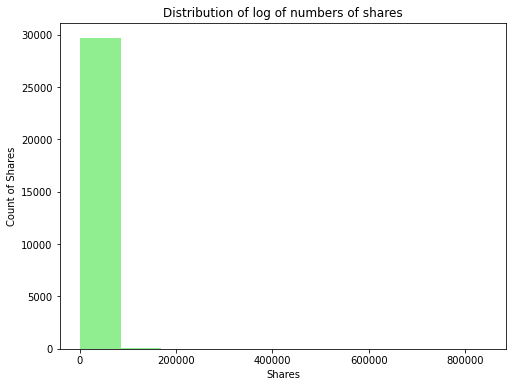

In [18]:
plt.figure(figsize= (8,6))
plt.hist(y,color="lightgreen")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()

##We see that number of shares a falling broadly in one category, so bucketing the share data and using Log for getting a bettwe sense of distribution

### Creating bucket taking log of number of shares to understand the distribution

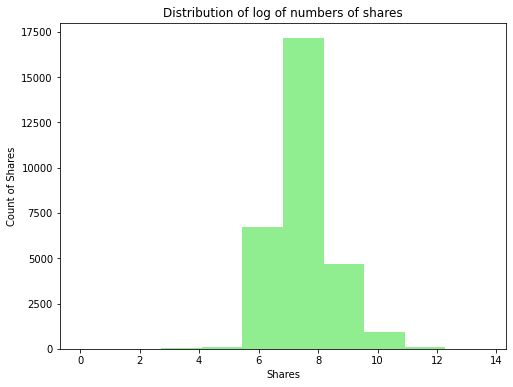

In [19]:
plt.figure(figsize= (8,6))
plt.hist(np.log(y),color="lightgreen")
plt.xlabel("Shares")
plt.ylabel("Count of Shares")
plt.title("Distribution of log of numbers of shares")
plt.show()

### HEATMAP FOR BIVARIATE ANALYSIS - CHECKING IF SOME HIGH CORRELATIONS ARE TOO PROMINENT OR NOT

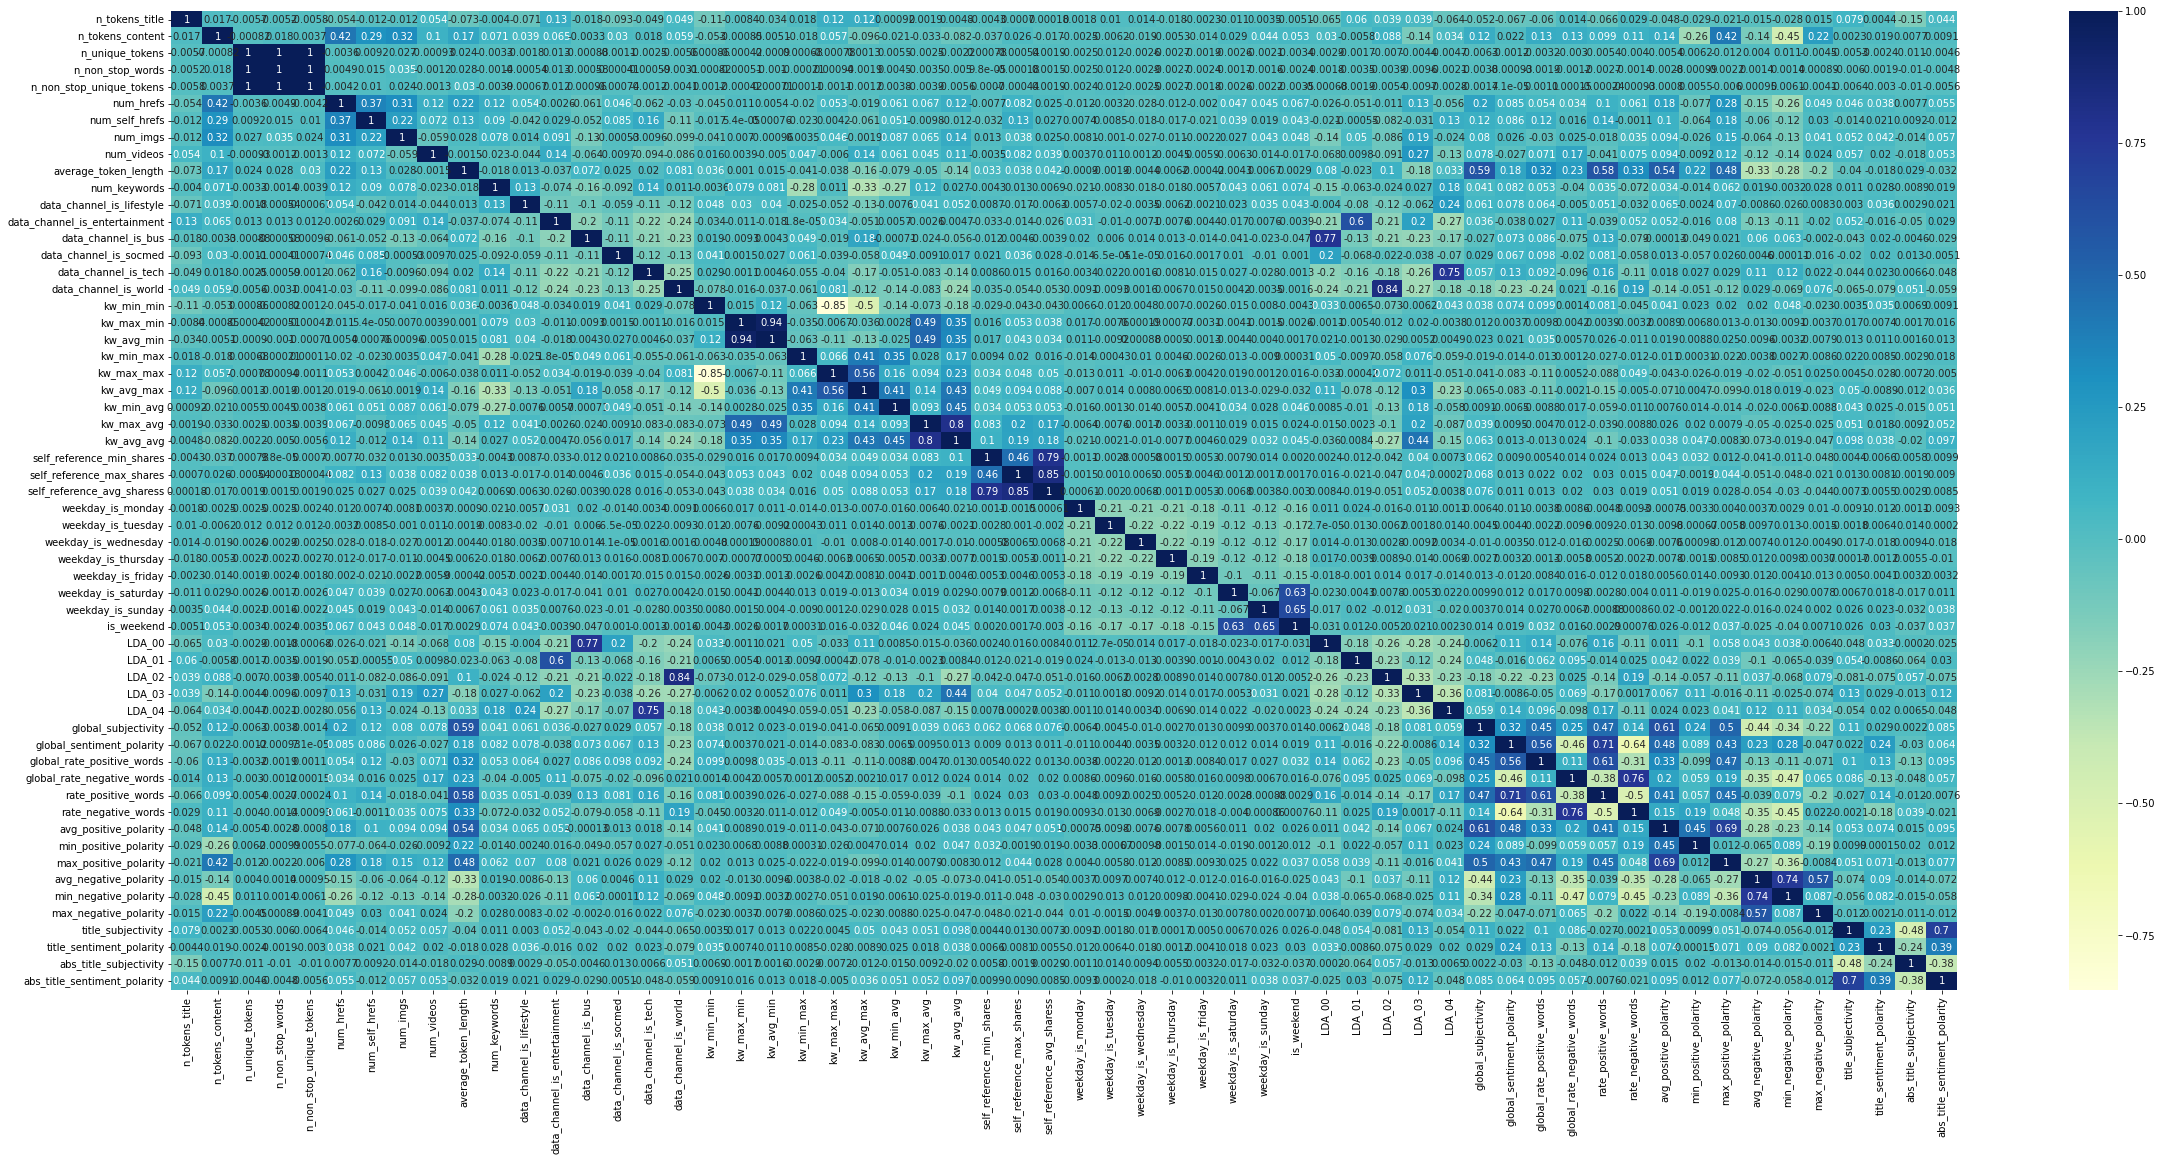

In [20]:
# plot the feature correlation heatmap
plt.figure(figsize=(40,18))
sns.heatmap(X.corr(),cmap="YlGnBu",annot=True) 
plt.show()

##AT THE OUTSET THERE DOESNT SEEM ANY OBVIOUS MULTICOLLINEARITY WHICH WOULD HELP US GET RID OF ANY FEATURE, MOVING FORWARD..

##Feature-wise Analysis

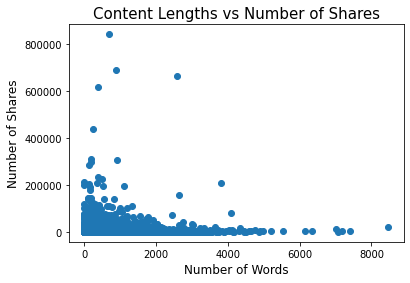

In [21]:
# number of words in the content vs number of shares
plt.scatter(data["n_tokens_content"], data["shares"])
plt.title("Content Lengths vs Number of Shares", size=15)
plt.xlabel("Number of Words", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

## HIGH SHARES ARE VISIBLE MOSTLY FOR WORDS RANGING TILL 2000

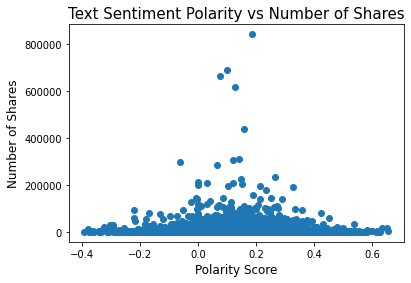

In [23]:
# text sentiment polarity vs number of shares
plt.scatter(data["global_sentiment_polarity"], data["shares"])
plt.title("Text Sentiment Polarity vs Number of Shares", size=15)
plt.xlabel("Polarity Score", size=12)
plt.ylabel("Number of Shares", size=12)
plt.show()

##Day of the week

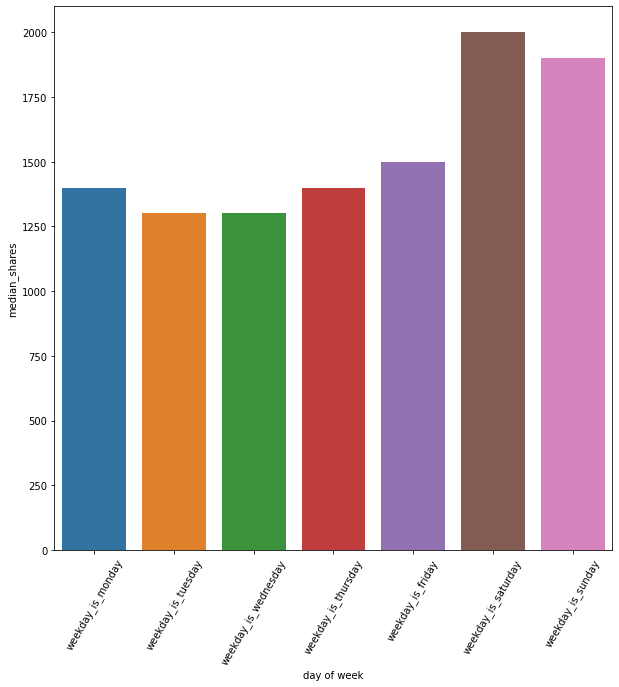

In [27]:
plt.figure(figsize= (10,10))
shares = []
cols = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday']
for d in cols:
    shares.append(data[data[d] == 1]['shares'].median())

ax = sns.barplot(x = cols, y = shares)
ax.set(xlabel = 'day of week', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

## Maximum shares are happening on Weekends

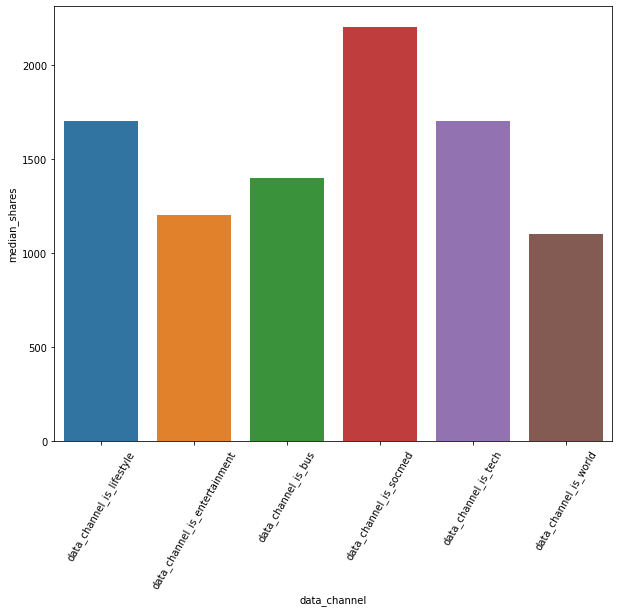

In [ ]:
plt.figure(figsize= (10,8))
channel = []
cols = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']
for d in cols:
    channel.append(data[data[d]==1]['shares'].median())

ax = sns.barplot(x = cols, y = channel)
ax.set(xlabel = 'data_channel', ylabel = 'median_shares')
plt.xticks(rotation = 60)
plt.show()

## SOCMED, TECH and LIFESTYLE are the channels with maximum shares

##OUTLIERS

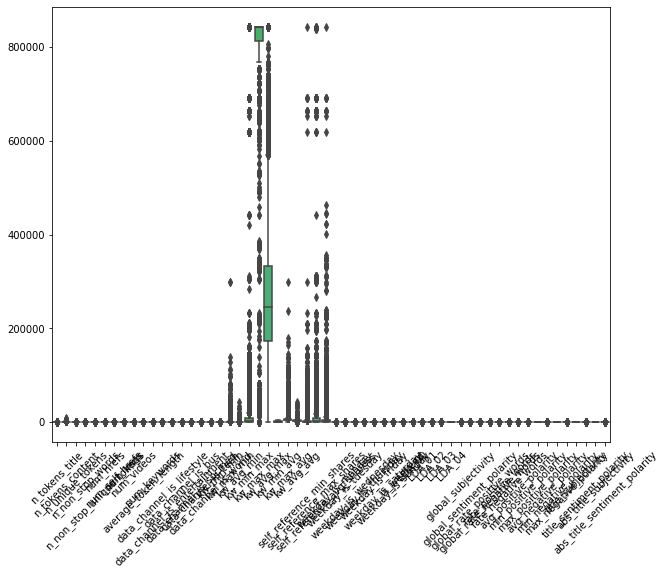

In [28]:
#checking for outliers
plt.figure(figsize=(10,8))
plt.xticks(rotation =45)
sns.boxplot(data = X)
plt.show()

## Treating Negative value columns

In [29]:
# Finding negative value columns.
negcols=X.columns[(X<=0).any()]
negcols

Index(['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words',
       'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos', 'average_token_length', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
      

In [30]:
#converting negative values to positive values .

for i in negcols:
    m=X[i].min()
    name=i 
    print(name)
    X[name]=((X[i]+1)-m)

n_tokens_content
n_unique_tokens
n_non_stop_words
n_non_stop_unique_tokens
num_hrefs
num_self_hrefs
num_imgs
num_videos
average_token_length
data_channel_is_lifestyle
data_channel_is_entertainment
data_channel_is_bus
data_channel_is_socmed
data_channel_is_tech
data_channel_is_world
kw_min_min
kw_max_min
kw_avg_min
kw_min_max
kw_max_max
kw_avg_max
kw_min_avg
kw_max_avg
kw_avg_avg
self_reference_min_shares
self_reference_max_shares
self_reference_avg_sharess
weekday_is_monday
weekday_is_tuesday
weekday_is_wednesday
weekday_is_thursday
weekday_is_friday
weekday_is_saturday
weekday_is_sunday
is_weekend
LDA_00
LDA_01
LDA_02
LDA_03
LDA_04
global_subjectivity
global_sentiment_polarity
global_rate_positive_words
global_rate_negative_words
rate_positive_words
rate_negative_words
avg_positive_polarity
min_positive_polarity
max_positive_polarity
avg_negative_polarity
min_negative_polarity
max_negative_polarity
title_subjectivity
title_sentiment_polarity
abs_title_subjectivity
abs_title_sentiment_

## CHECKING THE OPERATION TO TURN POSITVE

In [32]:
# Checking negative columns
negcols=X.columns[(X<=0).any()]
negcols

Index([], dtype='object')

In [33]:
# log transform with constant 10000 for real numbers
X = np.log((10000 + X))

##Taking data within 99 percentile

In [35]:
# Treating Outlier
for col in X.columns:
    percentiles = X[col].quantile([0.01, 0.99]).values
    X[col][X[col] <= percentiles[0]] = percentiles[0]
    X[col][X[col] >= percentiles[1]] = percentiles[1]

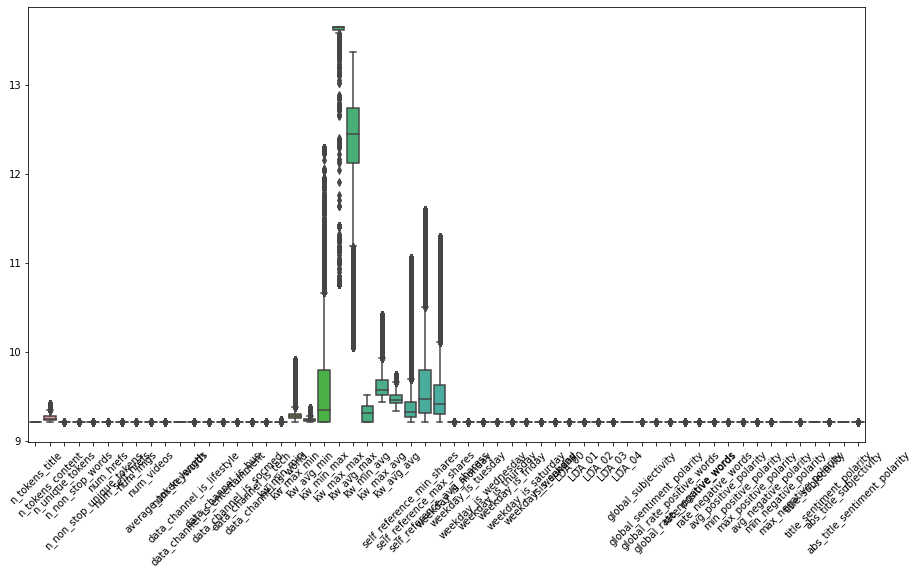

In [36]:
#checking for outliers again
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()

## After capping also few columns are not showhing good results so dropping them

In [37]:
cols = ['kw_min_min',
'kw_max_min',
'kw_avg_min',
'kw_min_max',
'kw_max_max',
'kw_avg_max',
'kw_min_avg',
'kw_max_avg',
'kw_avg_avg',
'data_channel_is_world',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'data_channel_is_tech',
 'data_channel_is_socmed',
'data_channel_is_lifestyle',
'data_channel_is_entertainment',
'data_channel_is_bus',
'data_channel_is_socmed',
'data_channel_is_tech',
'data_channel_is_world',
 'num_keywords',
'average_token_length',
'num_videos',
'num_hrefs',
'num_self_hrefs',
'num_imgs',
'num_videos',
'n_non_stop_unique_tokens',
 'n_non_stop_words',
 'n_unique_tokens',
 'n_tokens_content']
X = X.drop(cols, axis=1)


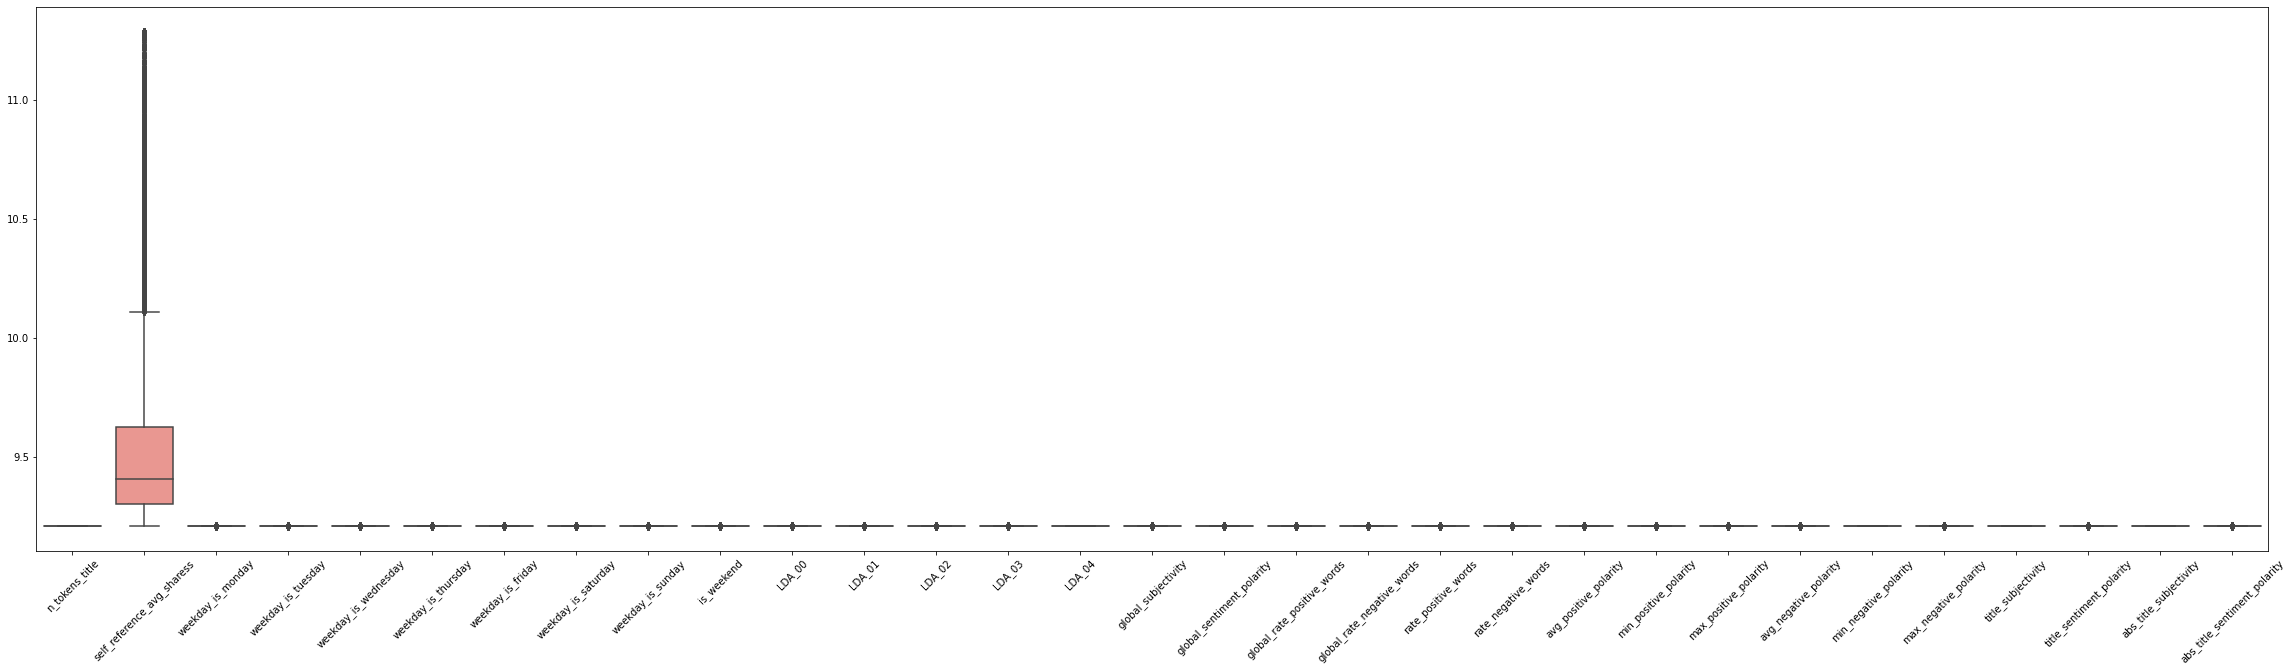

In [38]:
#checking for outliers again
plt.figure(figsize=(40,10))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()

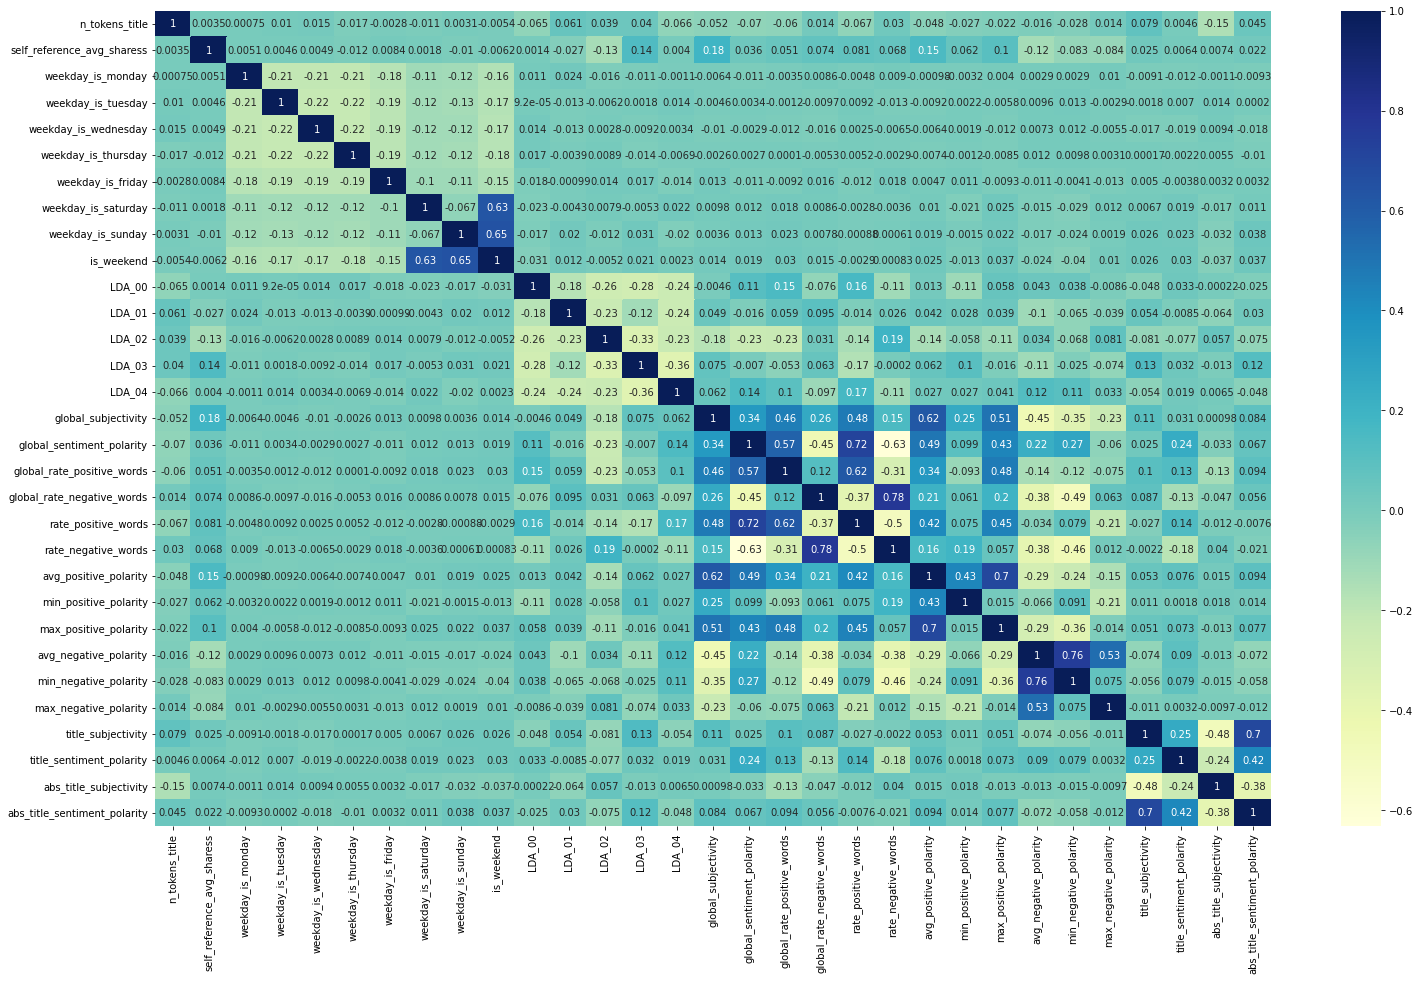

In [39]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(X.corr(),cmap="YlGnBu", annot=True)
plt.show()

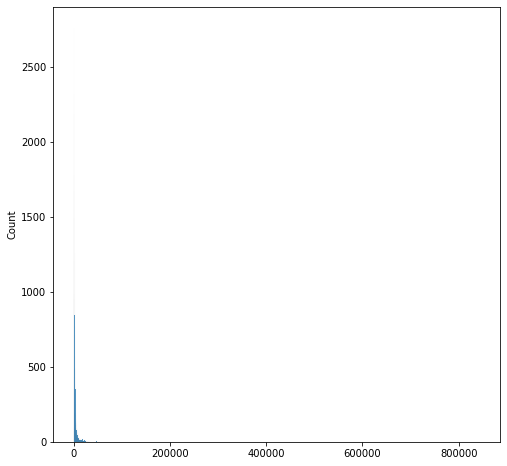

In [40]:
# Distribution for the target Variable
plt.figure(figsize=(8,8))
sns.histplot(y)
plt.show()

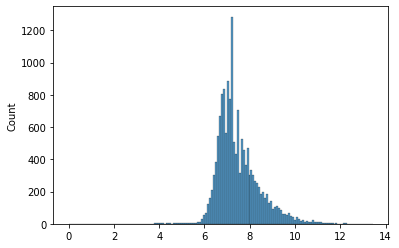

In [ ]:
#All the features are almost positively skewed, we'll log transform the features to neutralize the positive skewness in the dataset.

y = np.log(y)
sns.histplot(y)
#sns.histplot(np.log(y))
plt.show()

## SCALING THE DATA TO ACCOUNT FOR LARGE VALUE RANGES


In [41]:
scaler = StandardScaler()

X[:] = scaler.fit_transform(X)

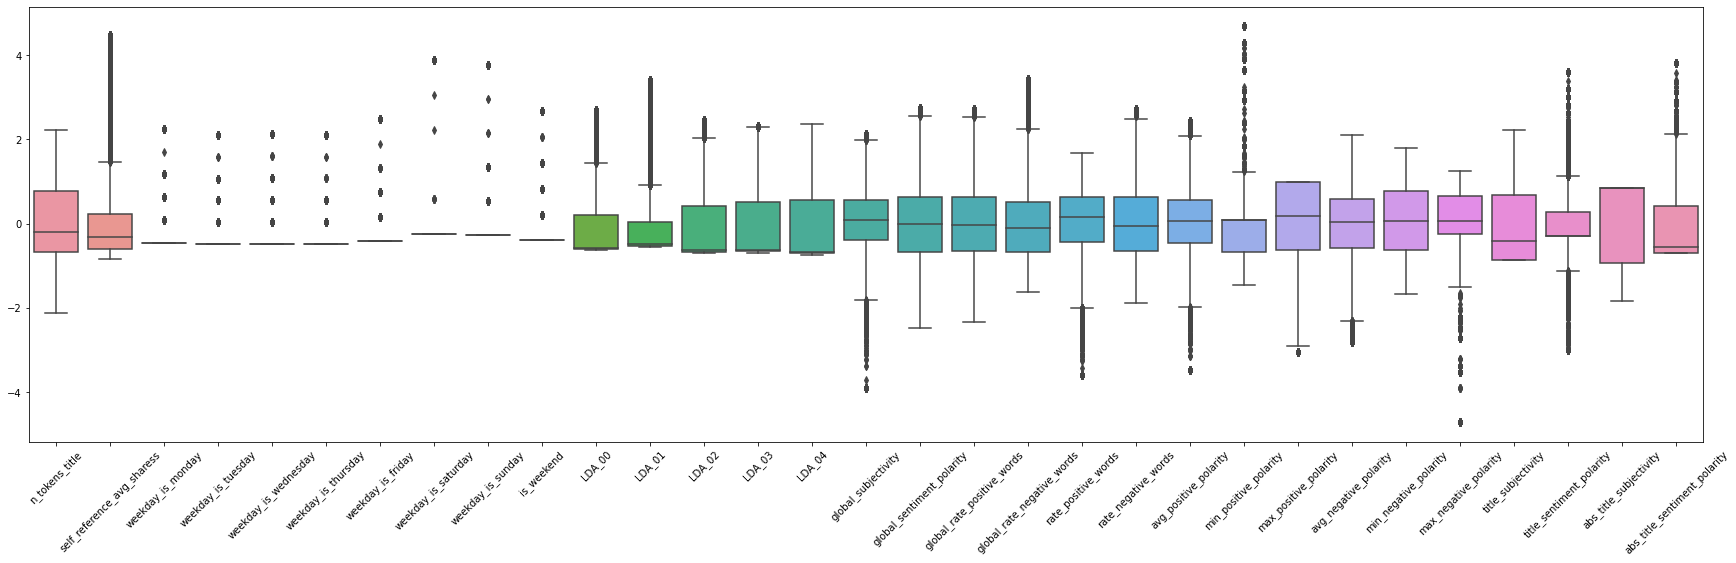

In [42]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=45)
sns.boxplot(data = X)
plt.show()

## Model Building

In [43]:
## Split into train test

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(20813, 31) (20813,)
(8920, 31) (8920,)


In [45]:
X_train.head()

,n_tokens_title,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
4585,-0.675068,-0.115223,-0.45549,2.108308,-0.488803,-0.477739,-0.412907,-0.256976,-0.274296,-0.396648,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.622192,0.887933,-0.925823,-0.448195,-0.077608,0.304847,1.783300,-0.275458,0.987637,1.183890,1.374181,0.062473,-0.871169,-0.282089,0.843976,-0.701241
13413,-0.675068,-0.653760,-0.45549,-0.483729,0.034874,2.112734,-0.412907,-0.256976,-0.274296,-0.396648,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.356613,0.411550,1.078679,-0.572540,0.856880,-0.861777,-0.202101,-0.940100,0.987637,0.064754,-1.660924,0.062473,-0.085960,-0.136814,-0.518955,-0.532046
9073,1.743040,3.042742,-0.45549,-0.483729,2.129477,-0.477739,-0.412907,-0.256976,-0.274296,-0.396648,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.732785,2.039913,0.425623,-1.617037,1.677393,-1.886146,0.670284,-0.173206,0.584661,2.101853,1.807746,1.254521,0.287328,1.848564,-1.166919,1.780216
28754,0.292320,0.062335,-0.45549,-0.483729,-0.488803,2.112734,-0.412907,-0.256976,-0.274296,-0.396648,1.182822,-0.482874,-0.649012,0.601100,-0.691818,-0.050065,0.219343,0.433235,-0.597335,0.720127,-0.691050,-0.376528,-0.940100,-0.019810,0.033704,-0.065293,0.658498,0.533064,0.246183,-1.593482,-0.085991
21620,0.292320,-0.316440,-0.45549,-0.483729,-0.488803,-0.477739,-0.412907,-0.256976,3.777591,2.668192,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.962994,0.336064,-0.742276,-1.176756,0.925257,-0.947140,0.962224,0.082425,0.987637,-2.818047,-0.793724,-4.705837,-0.871169,-0.282089,0.843976,-0.701241


## Feature Engineering and Selection

## Using RFE

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

rfe = RFE(lr)            
rfe = rfe.fit(X_train, Y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('n_tokens_title', True, 1),
 ('self_reference_avg_sharess', True, 1),
 ('weekday_is_monday', False, 5),
 ('weekday_is_tuesday', False, 14),
 ('weekday_is_wednesday', False, 4),
 ('weekday_is_thursday', False, 11),
 ('weekday_is_friday', False, 12),
 ('weekday_is_saturday', False, 6),
 ('weekday_is_sunday', False, 7),
 ('is_weekend', False, 2),
 ('LDA_00', True, 1),
 ('LDA_01', True, 1),
 ('LDA_02', True, 1),
 ('LDA_03', True, 1),
 ('LDA_04', True, 1),
 ('global_subjectivity', True, 1),
 ('global_sentiment_polarity', False, 3),
 ('global_rate_positive_words', False, 9),
 ('global_rate_negative_words', True, 1),
 ('rate_positive_words', True, 1),
 ('rate_negative_words', True, 1),
 ('avg_positive_polarity', True, 1),
 ('min_positive_polarity', False, 10),
 ('max_positive_polarity', True, 1),
 ('avg_negative_polarity', True, 1),
 ('min_negative_polarity', False, 16),
 ('max_negative_polarity', False, 17),
 ('title_subjectivity', False, 13),
 ('title_sentiment_polarity', False, 15),
 ('a

In [48]:
#The columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['n_tokens_title', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01',
       'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'abs_title_sentiment_polarity'],
      dtype='object')

In [50]:
# will pass the above columns to X train and create a new data frams consisting of selected features
X_train_rfe = X_train[col]
X_train_rfe.head()


,n_tokens_title,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,abs_title_sentiment_polarity
4585,-0.675068,-0.115223,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.622192,-0.448195,-0.077608,0.304847,1.783300,0.987637,1.183890,-0.701241
13413,-0.675068,-0.653760,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.356613,-0.572540,0.856880,-0.861777,-0.202101,0.987637,0.064754,-0.532046
9073,1.743040,3.042742,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.732785,-1.617037,1.677393,-1.886146,0.670284,0.584661,2.101853,1.780216
28754,0.292320,0.062335,1.182822,-0.482874,-0.649012,0.601100,-0.691818,-0.050065,-0.597335,0.720127,-0.691050,-0.376528,-0.019810,0.033704,-0.085991
21620,0.292320,-0.316440,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.962994,-1.176756,0.925257,-0.947140,0.962224,0.987637,-2.818047,-0.701241


In [51]:
X_test_rfe = X_test[col]
X_test_rfe.head()

,n_tokens_title,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,abs_title_sentiment_polarity
17455,1.743040,0.656108,1.104971,-0.490387,0.727584,-0.644323,-0.691919,0.909064,0.148044,0.438575,-0.339555,0.182483,0.987637,0.010922,0.915481
25193,-1.158835,-0.264636,-0.550716,-0.459928,1.501511,-0.622251,0.015396,-0.433269,-1.156085,1.334028,-1.457468,0.230437,0.987637,-0.618068,-0.701241
13154,0.775941,-0.597383,-0.576069,-0.490577,2.294149,-0.644867,-0.691924,-0.827650,0.001359,-0.360678,0.327341,-0.616303,-0.825786,-0.023887,1.554635
6712,-0.191350,-0.836815,0.387167,-0.528802,-0.678652,-0.673103,1.399406,-1.068004,0.386690,-1.247642,1.765468,-0.734065,-1.027283,0.175252,2.456953
29548,-1.642650,0.695838,1.729316,0.449981,-0.625770,-0.621342,-0.668560,0.552662,0.754524,-0.202968,0.461344,-0.101452,-0.221303,-0.854554,2.005796


In [52]:
# will pass the above columns to X test and create a new df
X_test_rfe = X_test[col]
X_test_rfe.head()

,n_tokens_title,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,max_positive_polarity,avg_negative_polarity,abs_title_sentiment_polarity
17455,1.743040,0.656108,1.104971,-0.490387,0.727584,-0.644323,-0.691919,0.909064,0.148044,0.438575,-0.339555,0.182483,0.987637,0.010922,0.915481
25193,-1.158835,-0.264636,-0.550716,-0.459928,1.501511,-0.622251,0.015396,-0.433269,-1.156085,1.334028,-1.457468,0.230437,0.987637,-0.618068,-0.701241
13154,0.775941,-0.597383,-0.576069,-0.490577,2.294149,-0.644867,-0.691924,-0.827650,0.001359,-0.360678,0.327341,-0.616303,-0.825786,-0.023887,1.554635
6712,-0.191350,-0.836815,0.387167,-0.528802,-0.678652,-0.673103,1.399406,-1.068004,0.386690,-1.247642,1.765468,-0.734065,-1.027283,0.175252,2.456953
29548,-1.642650,0.695838,1.729316,0.449981,-0.625770,-0.621342,-0.668560,0.552662,0.754524,-0.202968,0.461344,-0.101452,-0.221303,-0.854554,2.005796


In [55]:
# Applying PCA with the selected columns
pca=PCA(random_state=42)
pca.fit_transform(X_train_rfe)

array([[-1.11891953e+00, -9.69067446e-01, -4.16858086e-01, ...,
         6.37218875e-01,  1.62082361e-01, -1.87374669e-03],
       [ 4.54812188e-02, -1.64504092e+00, -1.96612993e-02, ...,
         3.63277433e-02,  1.55609597e-01, -2.08371505e-03],
       [-6.04704844e-01, -2.74228877e+00,  3.37416141e+00, ...,
         8.27832616e-02,  2.27521454e-01, -3.71017585e-04],
       ...,
       [-8.07268123e-01, -1.62298236e+00, -1.04541337e+00, ...,
         2.91463643e-02, -1.86523312e-01,  2.19714235e-04],
       [ 1.46063370e-01,  4.11252822e+00, -2.20481945e+00, ...,
        -4.77432305e-01, -2.70327592e-01, -4.62494010e-05],
       [-9.89886280e-01,  2.82746119e+00, -2.09425158e+00, ...,
         7.15932843e-01,  2.90547467e-01, -6.43161661e-04]])

In [56]:
# let's see the two components of PCA
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X_train_rfe.columns})
components

,PC1,PC2,Feature
0,0.023844,0.085124,n_tokens_title
1,-0.166879,-0.004436,self_reference_avg_sharess
2,-0.008873,-0.176780,LDA_00
3,-0.065529,0.076579,LDA_01
4,0.129893,0.187569,LDA_02
5,-0.073557,0.135273,LDA_03
6,0.005195,-0.218399,LDA_04
7,-0.476825,-0.102180,global_subjectivity
8,-0.271526,0.466807,global_rate_negative_words
9,-0.225411,-0.514633,rate_positive_words


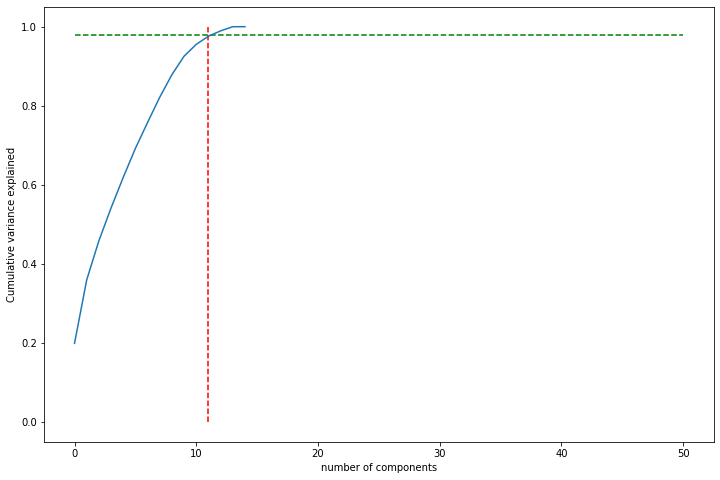

In [57]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=11, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=50, xmin=0, colors="g", linestyles="--")
plt.plot( np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")
plt.show()

In [58]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_train_rfe.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],'Feature':colnames})

In [59]:
#creating a dataframe for PCA on selected RFE columns
colnames = list(X_test_rfe.columns)
pca_df1 = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [60]:
#Creating a new df on features for train data
X_train_pca = X_train_rfe[pca_df.Feature[:11]]
X_train_pca.head()

,n_tokens_title,self_reference_avg_sharess,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_negative_words,rate_positive_words,rate_negative_words
4585,-0.675068,-0.115223,0.650721,1.046511,-0.649318,-0.644852,-0.086993,0.622192,-0.448195,-0.077608,0.304847
13413,-0.675068,-0.653760,1.725247,0.456562,-0.625773,-0.622273,-0.668857,-0.356613,-0.572540,0.856880,-0.861777
9073,1.743040,3.042742,-0.618202,0.350006,-0.688575,1.671128,-0.730387,0.732785,-1.617037,1.677393,-1.886146
28754,0.292320,0.062335,1.182822,-0.482874,-0.649012,0.601100,-0.691818,-0.050065,-0.597335,0.720127,-0.691050
21620,0.292320,-0.316440,-0.124296,-0.510149,0.510129,0.693519,-0.708348,-0.962994,-1.176756,0.925257,-0.947140


In [61]:
# now doing final PCA with 11 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=11)
df_train_pca = pca_final.fit_transform(X_train_pca)
df_train_pca.shape

(20813, 11)

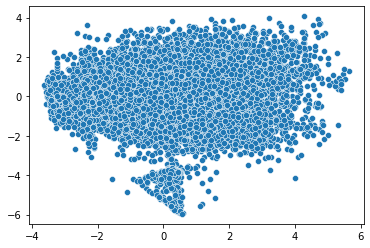

In [62]:
#Plotting first 2 PCA components
sns.scatterplot(x=df_train_pca[:,0], y=df_train_pca[:,1])
plt.show()

##APPLYING TRANSFORM TO TEST DATA

In [63]:
#Creating a new df on features for test data
X_test_pca = X_test_rfe[pca_df1.Feature[:11]]
X_test_pca.head()
df_test_pca = pca_final.transform(X_test_pca)
df_test_pca.shape

(8920, 11)

## APPLYING SIMPLE LINEAR REGRESSION

In [64]:
# creating function to get important metrics from each model
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [66]:
# Instantiate lin regression
lm = LinearRegression()

# Fitting line
lm.fit(df_train_pca, Y_train)
# predicting testing pca data
train_predict = lm.predict(df_train_pca)
test_predict = lm.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.014
r2:  0.014
MAE:  3204.0861
MSE:  157676177.4051
RMSE:  12556.9175

Test metrics
explained_variance:  0.0181
r2:  0.018
MAE:  3125.6048
MSE:  121712780.2244
RMSE:  11032.3515


## APPLYING RIDGE REGRESSION AND EVALUATING

In [67]:
from sklearn.model_selection import GridSearchCV,cross_val_score
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(df_train_pca, Y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [69]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.0001
ridge = Ridge(alpha=alpha)

ridge.fit(df_train_pca, Y_train)
print(ridge.coef_)

[   79.91776416   735.2330638    603.66794303  -292.02205292
  -553.98202842     3.0191642    354.40424949   398.85453859
  -479.33949473  -516.40742895 -1721.36153947]


## RIDGE RESULTS

In [71]:
# predicting
train_predict = ridge.predict(df_train_pca)
test_predict = ridge.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.014
r2:  0.014
MAE:  3204.0861
MSE:  157676177.4051
RMSE:  12556.9175

Test metrics
explained_variance:  0.0181
r2:  0.018
MAE:  3125.6048
MSE:  121712780.4621
RMSE:  11032.3515


## applying LASSO REGRESSION

## Using Grid Search Cross Validation for selecting the best alpha/lambda

In [76]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(df_train_pca, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [77]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [81]:
#Fitting Lasso model for alpha = 50 and printing coefficients which have been penalised

alpha =50
lasso = Lasso(alpha=alpha)
        
lasso.fit(df_train_pca, Y_train) 

Lasso(alpha=50)

In [82]:
lasso.coef_

array([  57.96502402,  705.20357954,  568.30457989, -251.49130499,
       -510.3239552 ,    0.        ,  301.83472867,  340.33094013,
       -266.6885019 , -241.55285361,   -0.        ])

## LASSO RESULTS

In [83]:
# predict it now...
train_predict = lasso.predict(df_train_pca)
test_predict = lasso.predict(df_test_pca)

print("Train metrics")
regression_results(Y_train.reshape(-1,),train_predict)

print()
print("Test metrics")
regression_results(Y_test.reshape(-1,),test_predict)

Train metrics
explained_variance:  0.0138
r2:  0.0138
MAE:  3202.2063
MSE:  157715059.2151
RMSE:  12558.4656

Test metrics
explained_variance:  0.0174
r2:  0.0173
MAE:  3124.8037
MSE:  121800915.7284
RMSE:  11036.3452


## SUBMISSION DATA FILE

In [84]:
## SUBMISSION DATA FILE

In [85]:
submission_data = unseen.set_index('id')[X_train_pca.columns]
submission_data.shape

(9911, 11)

In [86]:
missing_data_percent1=round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)
missing_data_percent1

n_tokens_title                0.00
self_reference_avg_sharess    1.03
LDA_00                        0.00
LDA_01                        0.00
LDA_02                        0.00
LDA_03                        0.00
LDA_04                        0.00
global_subjectivity           7.59
global_rate_negative_words    3.20
rate_positive_words           1.77
rate_negative_words           1.87
dtype: float64

In [87]:
# imputing missing values
impute_features1 = missing_data_percent1[missing_data_percent1.gt(0)].index
impute_features1

Index(['self_reference_avg_sharess', 'global_subjectivity',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words'],
      dtype='object')

In [88]:
# Imputed with KNN Imputer
imp= KNNImputer()
submission_data[impute_features1] = imp.fit_transform(submission_data[impute_features1])

In [89]:
#Checking the Null values again 
round(100 *(submission_data.isnull().sum()/len(submission_data.index)),2)

n_tokens_title                0.0
self_reference_avg_sharess    0.0
LDA_00                        0.0
LDA_01                        0.0
LDA_02                        0.0
LDA_03                        0.0
LDA_04                        0.0
global_subjectivity           0.0
global_rate_negative_words    0.0
rate_positive_words           0.0
rate_negative_words           0.0
dtype: float64

In [90]:
submission_data = pca_final.transform(submission_data)
submission_data.shape

(9911, 11)

## We ll go for Ridge regression as it gives slightly better result with lower RMSE values in our analysis

In [92]:

unseen["Shares"] = ridge.predict(submission_data)
output = unseen[['id','Shares']]
output.head()

,id,Shares
0,29733,2.138181e+06
1,29734,4.552013e+06
2,29735,3.714644e+03
3,29736,5.851882e+06
4,29737,1.395696e+06


### Finally, lets create a csv file out of this dataset, ensuring to set index=False to avoid an addition column in the csv.

In [93]:
output.to_csv('submission_regression_pca_ridge_lasso_lr.csv',index=False)

#END OF ANALYSIS